In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Display basic info
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Check for missing values
df.isnull().sum()
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('target', axis=1))
y = df['target']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [6]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [8]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [9]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)


In [10]:
def evaluate_model(name, y_true, y_pred):
    print(f" {name} Performance:")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))
    print('-'*40)


In [11]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)
evaluate_model("SVR", y_test, y_pred_svr)


 Linear Regression Performance:
MSE: 0.5558915986952442
MAE: 0.5332001304956565
R² Score: 0.575787706032451
----------------------------------------
 Decision Tree Performance:
MSE: 0.4942716777366763
MAE: 0.4537843265503876
R² Score: 0.6228111330554302
----------------------------------------
 Random Forest Performance:
MSE: 0.25549776668540763
MAE: 0.32761306601259704
R² Score: 0.805024407701793
----------------------------------------
 Gradient Boosting Performance:
MSE: 0.29399901242474274
MAE: 0.37165044848436773
R² Score: 0.7756433164710084
----------------------------------------
 SVR Performance:
MSE: 0.3551984619989429
MAE: 0.397763096343787
R² Score: 0.7289407597956454
----------------------------------------


In [12]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR'],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_gb),
        mean_squared_error(y_test, y_pred_svr)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gb),
        mean_absolute_error(y_test, y_pred_svr)
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gb),
        r2_score(y_test, y_pred_svr)
    ]
})

results.sort_values(by="R2 Score", ascending=False)


,Model,MSE,MAE,R2 Score
2,Random Forest,0.255498,0.327613,0.805024
3,Gradient Boosting,0.293999,0.371650,0.775643
4,SVR,0.355198,0.397763,0.728941
1,Decision Tree,0.494272,0.453784,0.622811
0,Linear Regression,0.555892,0.533200,0.575788


C:\Users\Riya\AppData\Local\Temp\ipykernel_15856\831296118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results, palette='Blues_r')


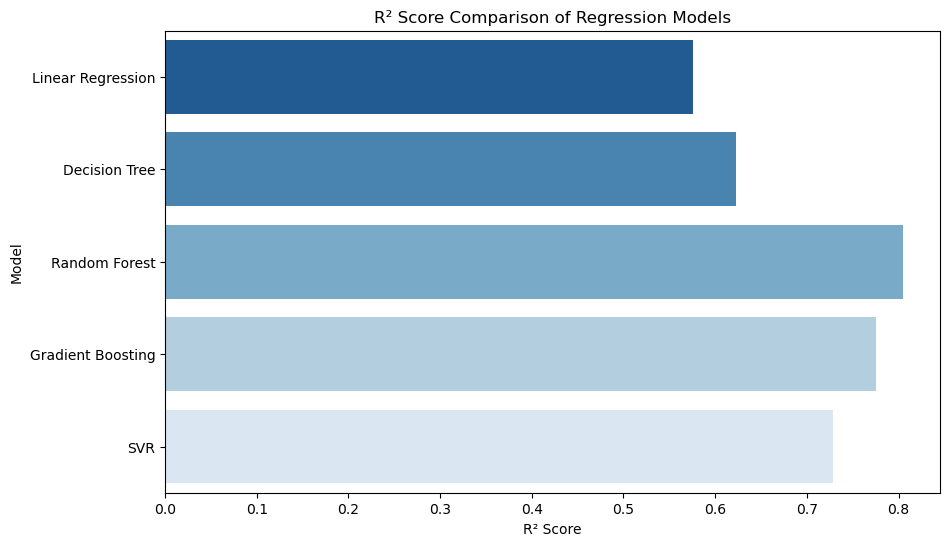

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x='R2 Score', y='Model', data=results, palette='Blues_r')
plt.title("R² Score Comparison of Regression Models")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.show()
